In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_selection import f_regression
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
#print(boston.feature_names)
#print(boston.DESCR)

(506, 13)


In [60]:
boston_table = pd.DataFrame(boston.data)
boston_table.columns = boston.feature_names
boston_table['MEDV'] = boston.target
#print(boston_table.head())
#print(boston_table.describe())
boston_table

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


[18.35]
[  1.15172   0.        8.14      0.        0.538     5.701    95.
   3.7872    4.      307.       21.      358.77     18.35   ]




[ 70.34793253  70.3443724  117.52227038  10.99838066  89.61208114
 308.36002731  67.3151842   27.50398153  67.23012884 101.44688866
 141.48772572  45.46361007 495.92670895]
Coefficients 0: [-0.41247848]
Intercept: 24.101205774233453
MSE: 66.9151547546683
---------------
Coefficients 1: [0.15257264]
Intercept: 20.830639002024025
MSE: 75.10830109944823
---------------
Coefficients 2: [-0.65510467]
Intercept: 29.751473365584836
MSE: 57.56276184296058
---------------
Coefficients 3: [5.95524316]
Intercept: 22.234042553191486
MSE: 74.85865756754262
---------------
Coefficients 4: [-34.53515511]
Intercept: 41.695544551223165
MSE: 64.12228379419476
---------------
Coefficients 5: [8.82345634]
Intercept: -32.839129906011266
MSE: 23.970455527991305


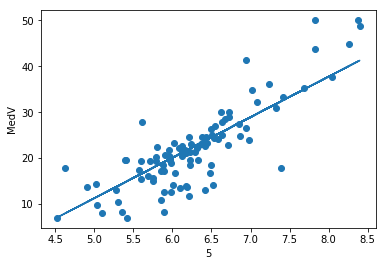

---------------
Coefficients 6: [-0.12402883]
Intercept: 31.04617412774555
MSE: 67.8462187008521
---------------
Coefficients 7: [1.14203634]
Intercept: 18.26899532544111
MSE: 74.25783765836503
---------------
Coefficients 8: [-0.40378907]
Intercept: 26.494772091458852
MSE: 66.36195010598259
---------------
Coefficients 9: [-0.0247456]
Intercept: 32.67181214858772
MSE: 55.27592896210288
---------------
Coefficients 10: [-2.15901079]
Intercept: 62.426556023258435
MSE: 59.15265212517365
---------------
Coefficients 11: [0.03321748]
Intercept: 10.728455938270416
MSE: 66.56597738624318
---------------
Coefficients 12: [-0.97981166]
Intercept: 34.87291567862843
MSE: 38.82182901428658


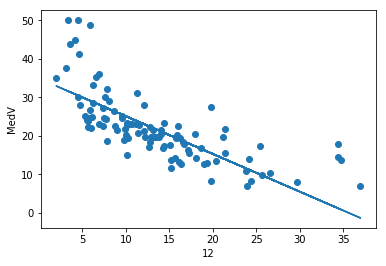

---------------


In [251]:
from sklearn.model_selection import train_test_split

# Y = Boston Housing Price; X = all other features

#print(boston.data.shape)
#print(boston.data[0])

X = boston.data
Y = boston.target

#X = boston_table.drop(columns=['MEDV'])
#Y = boston_table['MEDV']


X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 5)
# print(X_train.shape)
# print(X_test.shape) 
# print(Y_train.shape) 
# print(Y_test.shape) 

# print("Crime min: {}".format(min(X_test[:, 0])))
# print("Crime max: {}".format(max(X_test[:, 0])))

from sklearn.feature_selection import SelectKBest
kbest = SelectKBest(f_regression, k=1)
arr = kbest.fit_transform(X_train, Y_train)
print(arr[0])
print(X_train[0])

# kbest.fit(X_train, Y_train)
# arr = kbest.transform(X_train)
# print(kbest.scores_)


from sklearn.linear_model import LinearRegression

# Create linear regression object
# LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
#linear_reg = LinearRegression()
#linear_reg2 = LinearRegression()

# Train the model using the training sets
#linear_reg.fit(arr, Y_train)
#linear_reg2.fit(X_train[:, 12].reshape(-1, 1), Y_train)

# Make predictions using the testing set
#Y_pred = linear_reg.predict(kbest.transform(X_test))
#Y_pred = linear_reg2.predict(X_test[:, 12].reshape(-1, 1))


#plt.scatter(Y_pred, Y_test)
#plt.xlabel("Predicted Price")
#plt.ylabel("Real Price")
# #plt.scatter(X_test[:, 12], Y_test)
#plt.scatter(X_test[:, 12], Y_pred)

# print(max(Y_pred))
# print(min(Y_pred))
# print(max(Y_test))
# print(min(Y_test))
# #plt.plot(X_test[:, 12], Y_pred)
# # # plt.plot(X_test[:, 12], Y_pred2)
# plt.show()

# print('Coefficients:', linear_reg.coef_)
# print(linear_reg.intercept_)


# mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
# print('Mean squared error:', mse)

print("\n\n\n")
print(kbest.scores_)
arr = [5, 12]
for i in range(13):        
    reg = LinearRegression()
    reg.fit(X_train[:, i].reshape(-1, 1), Y_train)
    pred = reg.predict(X_test[:, i].reshape(-1, 1))
    print('Coefficients {}: {}'.format(i, reg.coef_))
    print("Intercept: {}".format(reg.intercept_))
    print("MSE: {}".format(sklearn.metrics.mean_squared_error(Y_test, pred)))
    if i in arr:
        plt.scatter(X_test[:, i], Y_test)
        #plt.scatter(X_test[:, i], pred)
        plt.xlabel(i)
        plt.ylabel("MedV")
        plt.plot(X_test[:, i], pred)
        plt.show()
    print("---------------")

In [187]:
pd.DataFrame(list(zip(boston_table.columns, linear_reg.coef_)), columns=['feature', 'coefficient'])

,feature,coefficient
0,CRIM,-0.412478


In [7]:
errors = {}
for feature in boston.feature_names:
    linear_reg = LinearRegression()
    linear_reg.fit(X[[feature]], Y)
    mean_squared_error = np.mean((Y - linear_reg.predict(X[[feature]])) ** 2)
    errors[feature] = mean_squared_error
errors = sorted(errors.items(), key=lambda x: x[1])
print("Features that Minimize Error")
print(30 * "-")
for e in errors:
    print(e[0], "\t", e[1])

Features that Minimize Error
------------------------------
LSTAT 	 38.48296722989415
RM 	 43.60055177116956
PTRATIO 	 62.652200013769274
INDUS 	 64.6662216410753
TAX 	 65.88727533683912
NOX 	 69.0042883554067
CRIM 	 71.85234666526337
RAD 	 72.1248118807528
AGE 	 72.42398092899337
ZN 	 73.45169609475562
B 	 75.0324292075191
DIS 	 79.1463415860711
CHAS 	 81.82651411931556


Coefficients: [-0.97981166]
Mean squared error: 38.82182901428658


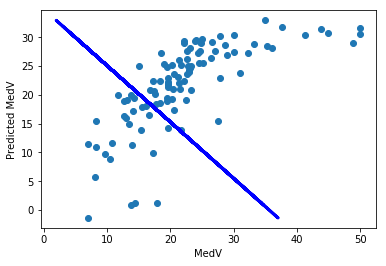

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Y = Boston Housing Price; X = LSTAT
X = boston_table.drop(columns=['MEDV','CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
 'B'])
Y = boston_table['MEDV']


X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 5)

# Create linear regression object
# LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
linear_reg = LinearRegression()

# Train the model using the training sets
linear_reg.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = linear_reg.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("MedV")
plt.ylabel("Predicted MedV")

print('Coefficients:', linear_reg.coef_)
plt.plot(X_test, Y_pred, color='blue', linewidth=3)


mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print('Mean squared error:', mse)

Coefficients: [-34.53515511]
Mean squared error: 64.12228379419476


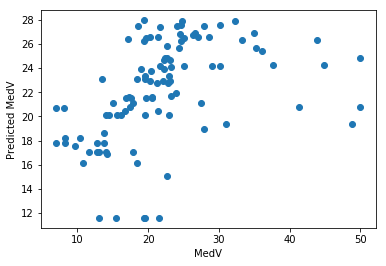

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Y = Boston Housing Price; X = NOX
X = boston_table.drop(columns=['MEDV','CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
 'B', 'LSTAT'])
Y = boston_table['MEDV']


X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 5)

# Create linear regression object
# LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
linear_reg = LinearRegression()

# Train the model using the training sets
linear_reg.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = linear_reg.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("MedV")
plt.ylabel("Predicted MedV")


print('Coefficients:', linear_reg.coef_)

mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print('Mean squared error:', mse)

Coefficients: [5.95524316]
Mean squared error: 74.85865756754262


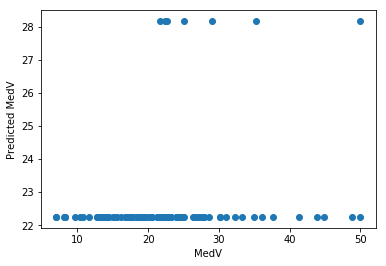

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Y = Boston Housing Price; X = CHAS
X = boston_table.drop(columns=['MEDV','CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
 'B', 'LSTAT'])
Y = boston_table['MEDV']


X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 5)

# Create linear regression object
# LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
linear_reg = LinearRegression()

# Train the model using the training sets
linear_reg.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = linear_reg.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("MedV")
plt.ylabel("Predicted MedV")


print('Coefficients:', linear_reg.coef_)

mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print('Mean squared error:', mse)

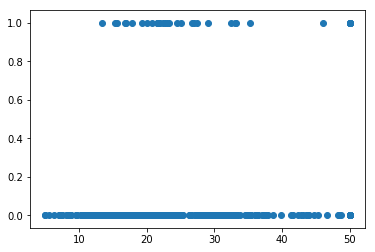

In [11]:
plt.scatter(boston_table.MEDV, boston_table.CHAS)